In [1]:
import re

def tokenize(text):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)
    return words


text = ""
with open(r"..\book.txt", 'r', encoding="utf-8") as txt:
    text = txt.read()
print(text)

Михаил Шолохов.
Тихий Дон
* КНИГА ПЕРВАЯ *
Не сохами-то славная землюшка наша распахана…
Распахана наша землюшка лошадиными копытами,
А засеяна славная землюшка казацкими головами,
Украшен-то наш тихий Дон молодыми вдовами,
Цветет наш батюшка тихий Дон сиротами,
Наполнена волна в тихом Дону отцовскими, материнскими
слезами.
Ой ты, наш батюшка тихий Дон!
Ой, что же ты, тихий Дон, мутнехонек течешь?
Ах, как мне, тихому Дону, не мутну течи!
Со дна меня, тиха Дона, студены ключи бьют,
Посередь меня, тиха Дона, бела рыбица мутит
Старинные казачьи песни
* ЧАСТЬ ПЕРВАЯ *
I
Мелеховский двор — на самом краю хутора. Воротца со скотиньего база ведут на север
к Дону. Крутой восьмисаженный спуск меж замшелых в прозелени меловых глыб, и вот
берег: перламутровая россыпь ракушек, серая изломистая кайма нацелованной волнами
гальки и дальше — перекипающее под ветром вороненой рябью стремя Дона. На восток, за
красноталом гуменных плетней, — Гетманский шлях, полынная проседь, истоптанный
конскими копытами

In [2]:
tokens = tokenize(text)
tokens

['михаил',
 'шолохов',
 'тихий',
 'дон',
 'книга',
 'первая',
 'не',
 'сохами',
 'то',
 'славная',
 'землюшка',
 'наша',
 'распахана',
 'распахана',
 'наша',
 'землюшка',
 'лошадиными',
 'копытами',
 'а',
 'засеяна',
 'славная',
 'землюшка',
 'казацкими',
 'головами',
 'украшен',
 'то',
 'наш',
 'тихий',
 'дон',
 'молодыми',
 'вдовами',
 'цветет',
 'наш',
 'батюшка',
 'тихий',
 'дон',
 'сиротами',
 'наполнена',
 'волна',
 'в',
 'тихом',
 'дону',
 'отцовскими',
 'материнскими',
 'слезами',
 'ой',
 'ты',
 'наш',
 'батюшка',
 'тихий',
 'дон',
 'ой',
 'что',
 'же',
 'ты',
 'тихий',
 'дон',
 'мутнехонек',
 'течешь',
 'ах',
 'как',
 'мне',
 'тихому',
 'дону',
 'не',
 'мутну',
 'течи',
 'со',
 'дна',
 'меня',
 'тиха',
 'дона',
 'студены',
 'ключи',
 'бьют',
 'посередь',
 'меня',
 'тиха',
 'дона',
 'бела',
 'рыбица',
 'мутит',
 'старинные',
 'казачьи',
 'песни',
 'часть',
 'первая',
 'i',
 'мелеховский',
 'двор',
 'на',
 'самом',
 'краю',
 'хутора',
 'воротца',
 'со',
 'скотиньего',
 'база',
 

In [3]:
import pymorphy3
from collections import Counter

morph = pymorphy3.MorphAnalyzer()

def lemmatize_and_filter(words):
    lemmas = []
    for word in words:
        parsed = morph.parse(word)[0]
        lemma = parsed.normal_form

        
        if parsed.tag.POS not in {'PREP', 'NPRO', 'CONJ', 'PRCL', 'ADVB', 'NUMR'}:
            lemmas.append(lemma)
    return lemmas


In [4]:
lemmas = lemmatize_and_filter(tokens)

In [5]:
stop_words = {
    'и', 'в', 'на', 'что', 'был', 'была', 'было', 'были',
    'он', 'она', 'оно', 'не', 'с', 'по', 'как', 'о', 'у', 'к', 'то',
    'но', 'да', 'же', 'мы', 'вы', 'я', 'они', 'мне', 'его', 'её', 'их',
    'ты', 'тебя', 'твой', 'свой', 'этот', 'этого', 'эти', 'те', 'для',
    'его', 'ее', 'так', 'это', 'больше', 'еще', 'чтобы', 'а', 'из', "под",
    'до', 'ну', "бы", 'за', 'от', 'со', 'через', 'все', 'вот', 'ему', 'только', 'чего',
    'тогда', 'уже', 'меня', 'когда', 'него', 'тебе', 'тут', 'нас', 'где', 'там', 'кто',
    'над', 'надо', 'ни'
}
counter_f = Counter(tokens)
top_10_f = Counter(counter_f).most_common(10)

print("Топ-10 самых частотных слов (нелемматизированных, до удаления стоп-слов):")
for word, freq in top_10_f:
    print(f"{word}: {freq}")

counter_f = Counter([token for token in tokens if token not in stop_words])
top_10_f = Counter(counter_f).most_common(10)

print("Топ-10 самых частотных слов (нелемматизированных, после удаления стоп-слов):")
for word, freq in top_10_f:
    print(f"{word}: {freq}")


blocked = {'этот', 'тот', 'такой', 'какой', 'твой', 'мой', 'наш', 'ваш', 'й'}
filtered_lemmas = filter(lambda lemma: lemma not in blocked, lemmas)

counter_t = Counter(filtered_lemmas)
top_20_t = counter_t.most_common(20)

print("Топ-20 самых частотных слов (лемматизированных):")
for word, freq in top_20_t:
    print(f"{word}: {freq} ")


Топ-10 самых частотных слов (нелемматизированных, до удаления стоп-слов):
и: 13491
в: 10557
на: 9159
не: 7000
с: 5817
а: 4301
он: 3352
что: 3351
к: 3312
как: 3164
Топ-10 самых частотных слов (нелемматизированных, после удаления стоп-слов):
григорий: 2254
сказал: 721
казаки: 679
григория: 583
казаков: 573
глаза: 540
спросил: 533
нет: 512
аксинья: 480
пантелей: 467
Топ-20 самых частотных слов (лемматизированных):
быть: 3532 
григорий: 3181 
казак: 1828 
рука: 1343 
глаз: 1305 
сказать: 1266 
свой: 1243 
один: 1139 
весь: 1046 
идти: 1021 
голова: 837 
хутор: 828 
говорить: 823 
конь: 802 
нога: 795 
лицо: 766 
аксинья: 759 
человек: 697 
спросить: 690 
лошадь: 672 


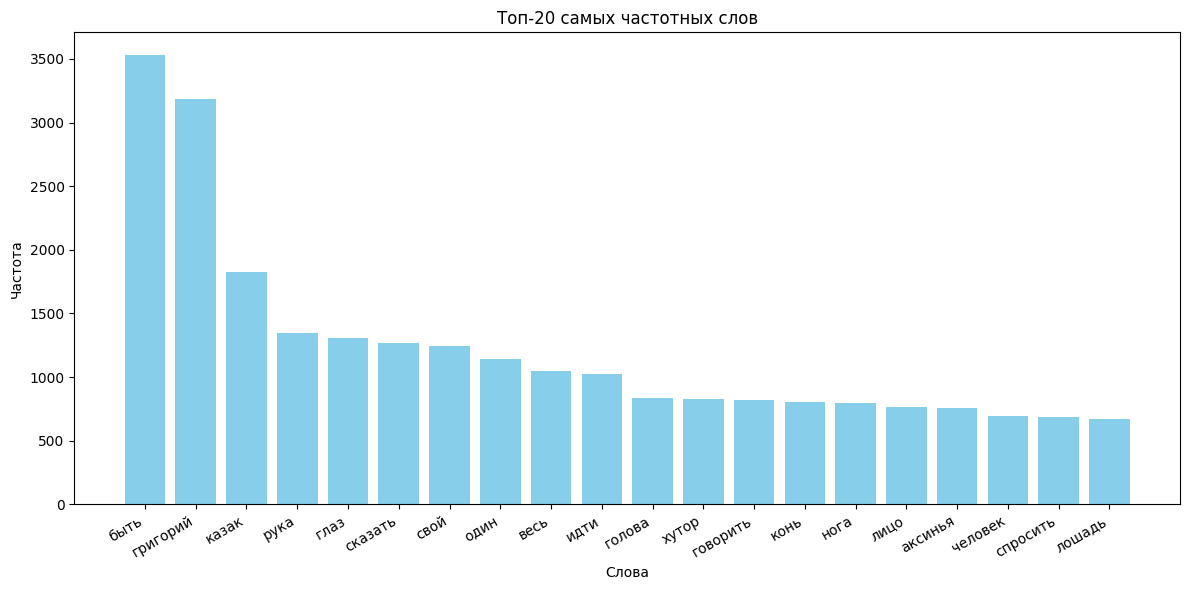

In [6]:
import matplotlib.pyplot as plt
words = [item[0] for item in top_20_t]
freqs = [item[1] for item in top_20_t]

plt.figure(figsize=(12, 6))
plt.bar(words, freqs, color='skyblue')
plt.xticks(rotation=30, ha='right')
plt.title('Топ-20 самых частотных слов')
plt.xlabel('Слова')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

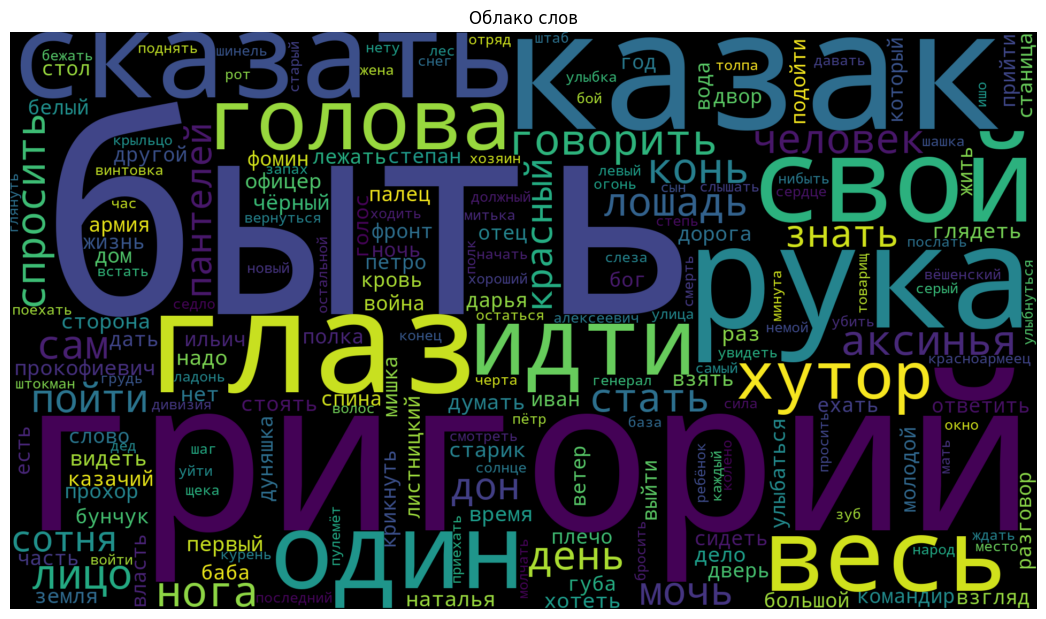

In [7]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1920, height=1080, background_color='black').generate_from_frequencies(counter_t)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов')
plt.show()

# Отчет
## Произведение
Я выбрал роман-эпопею "Тихий Дон" М.А. Шелохова. В нем 1328 страниц, 
 если говорить про печатный формат, или 883 страницы, 
 если говорить про мою pdf.
## Топ-10 слов
После удаления стоп-слов самыми частотными оказались:
1. григорий: 2254
2. сказал`: 721
3. казаки: 679
4. григория: 583
5. казаков: 573
6. глаза: 540
7. спросил: 533
8. нет: 512
9. аксинья: 480
10. пантелей: 467

Тут уже видно, что встречаются разные склонения одного и того-же слова (`григорий`/`григория`).
Поэтому нужно их лемматизировать, то-есть привести к нормальной форме.
## Топ-5 лемм
1. быть: 3532 
2. григорий: 3181 
3. казак: 1828 
4. рука: 1343 
5. глаз: 1305 

Мне, если честно, не очень понравились топ-5 лемм. Столько вхождений слов `григорий` и ``казак
 вполне соотносятся с сюжетом и тематикой книги. Слова же `быть`, `рука` и `глаз`, хотя и несут 
 какой-то смысл сами по себе, но при этом мало что говорят о произведении.

## Именованные сущности
* `Григорий` - главный герой произведения;
* `Аксинья` - возлюбленная главного героя;
* `Дон` - река. (Книга про донское казачество);
* `Пантелей` - отец Григория;
* `Дуняшка` - сестра Григория.

## Предсказание тематики по частотам слов
Я, конечно, с произведением знаком, но постараюсь быть объективным.
Очевидно, что `Григорий` это имя главного героя. `Аксинья`, видимо, важная для него женщина.
 По словам `Казак`, `Конь`, `Хутор`, `Дон` 
можно сказать, что книга про донское казачество, и сам Григорий скорее всего казак.
По словам `Война`, `Дивизия`, `Фронт`, `Армия` можно предположить, что в произведении фигурируют военные действия.
По словам `Винтовка`, `Убить`, `Кровь` можно утверждать, что главный герой принимает в войне активное участие.
Слова `Красный`, `Белый`, `Красноармеец` намекают, что действия происходят во время гражданской войны в России.

## Трудности и особые слова
В целом, особо трудностей не возникло. Наверное единственное это нейтральные слова, 
во первых, в библиотеке pymorph3 почему-то нет таких частей речи как притяжательное местоимение или определительное местоимение, 
поэтому приходится часть блокировать в ручную. Во вторых, не очень понятна ценность некоторых слов, 
которые вроде что-то обозначают, но о тексте в целом информации почти не несут. 

Произведение относительно современное поэтому массовых архаизмов нет. Разве что разговорные слова `Нету` или `Ишо`.


